<a href="https://colab.research.google.com/github/qrosakee/data-analysis-covid-cv/blob/main/covid_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout
from keras.optimizers import adam_v2 as Adam
import keras.backend

In [ ]:
images = np.load("CovidImages.npy")

In [ ]:
labels = pd.read_csv("CovidLabels.csv")

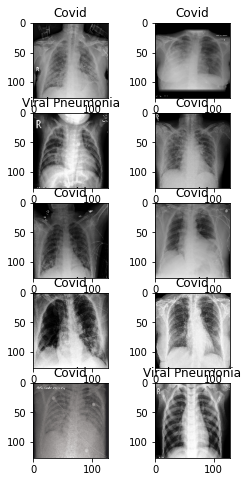

In [ ]:
def disp_images(images, labels):
  fig = plt.figure(figsize=(4,8))
  num_cols = 2
  num_rows = 5
  for i in np.arange(num_cols):
    for j in np.arange(num_rows):
      random_index = np.random.randint(0, len(labels))
      ax = fig.add_subplot(num_rows, num_cols, i*num_rows+j+1)
      ax.set_title(labels.Label[random_index])
      ax.imshow(images[random_index])
  plt.show()

disp_images(images, labels)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


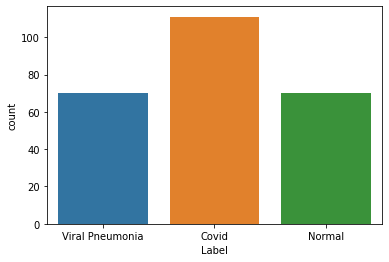

In [ ]:
sns.countplot(labels.Label)

(128, 128, 3)


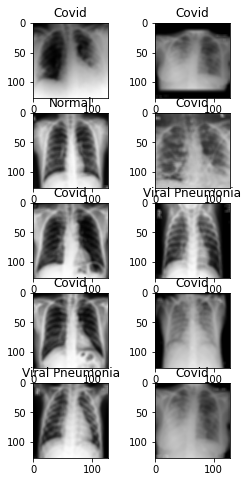

In [ ]:
lores_images = []
for i in np.arange(len(images)):
  lores_images.append(cv2.GaussianBlur(images[i], (5,5), 10))
print(lores_images[0].shape)
disp_images(lores_images, labels)

Prepare train/test split

In [ ]:
X = np.array(lores_images)
y = labels.Label

lb = LabelBinarizer()
encoded_y = lb.fit_transform(y)

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, encoded_y, test_size=0.2, random_state=1)

Normalize Data

In [ ]:
X_train_one_channel = np.mean(X_train, axis=3)
X_train_one_channel_normalized = X_train_one_channel.astype(float)/(255)

X_test_one_channel_normalized = np.mean(X_test, axis=3).astype(float)/255

In [ ]:
X_train_one_channel_normalized.shape

(200, 128, 128)

Model Building

In [ ]:
keras.backend.clear_session()

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation="swish", kernel_regularizer="L2",
                 padding="same", input_shape=(128,128,1)))
model.add(MaxPool2D(padding="same"))
model.add(Conv2D(24, (3,3), activation="swish", padding="same", kernel_regularizer="L2",))
model.add(MaxPool2D(padding="same"))
model.add(Flatten())

model.add(Dense(16, activation="swish"))
model.add(Dropout(0.4))
model.add(Dense(3, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_one_channel_normalized,
                    y_train_encoded, epochs=30,
                    validation_split=0.2
                    )

Epoch 1/30
5/5 [==============================] - 6s 1s/step - loss: 1.4582 - accuracy: 0.4250 - val_loss: 1.3326 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 5s 987ms/step - loss: 1.3107 - accuracy: 0.4812 - val_loss: 1.1816 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - 5s 976ms/step - loss: 1.0172 - accuracy: 0.7188 - val_loss: 0.7724 - val_accuracy: 0.8750
Epoch 4/30
5/5 [==============================] - 5s 968ms/step - loss: 0.8685 - accuracy: 0.7312 - val_loss: 0.5902 - val_accuracy: 0.8750
Epoch 5/30
5/5 [==============================] - 5s 971ms/step - loss: 0.8141 - accuracy: 0.7875 - val_loss: 0.6167 - val_accuracy: 0.9000
Epoch 6/30
5/5 [==============================] - 5s 976ms/step - loss: 0.6966 - accuracy: 0.8438 - val_loss: 0.5960 - val_accuracy: 0.9000
Epoch 7/30
5/5 [==============================] - 5s 972ms/step - loss: 0.6338 - accuracy: 0.8625 - val_loss: 0.5011 - val_accuracy: 0.9000
Epoch 8/30
5/5 [=======

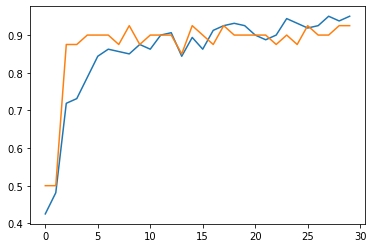

In [ ]:
train_results = history.history['accuracy']
val_results = history.history['val_accuracy']

plt.plot(train_results)
plt.plot(val_results)

In [ ]:
y_args_pred.shape

(51,)

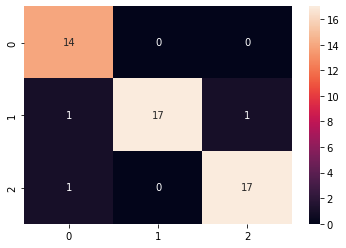

In [ ]:
y_pred = model.predict(X_test_one_channel_normalized)

y_args_pred = np.argmax(y_pred, axis=1)
y_args_test = np.argmax(y_test_encoded, axis=1)

cm = tf.math.confusion_matrix(y_args_test, y_args_pred)
sns.heatmap(cm, annot=True)

In [ ]:
def disp_all_images(images, labels=None, labels2=None):
  fig = plt.figure(figsize=(4,8))
  num_cols = 1
  num_rows = int(len(images)/num_cols)
  for i in np.arange(len(images)):
      ax = fig.add_subplot(num_rows, num_cols,i+1 )
      if labels == None or labels2 == None:
        pass
      else:
        ax.set_title("Actual" + labels[i] + "Predicted" + labels2[i])
      ax.imshow(images[i])
  plt.show()

In [ ]:
lb.inverse_transform(y_pred)

array(['Viral Pneumonia', 'Normal', 'Viral Pneumonia', 'Covid', 'Covid',
       'Normal', 'Viral Pneumonia', 'Normal', 'Covid', 'Viral Pneumonia',
       'Normal', 'Normal', 'Covid', 'Normal', 'Covid', 'Covid', 'Normal',
       'Covid', 'Viral Pneumonia', 'Covid', 'Normal', 'Viral Pneumonia',
       'Covid', 'Normal', 'Covid', 'Covid', 'Covid', 'Normal',
       'Viral Pneumonia', 'Normal', 'Normal', 'Viral Pneumonia',
       'Viral Pneumonia', 'Normal', 'Covid', 'Normal', 'Viral Pneumonia',
       'Viral Pneumonia', 'Viral Pneumonia', 'Normal', 'Normal',
       'Viral Pneumonia', 'Covid', 'Covid', 'Viral Pneumonia', 'Covid',
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia',
       'Viral Pneumonia', 'Normal'], dtype='<U15')

In [ ]:
y_test_encoded.take(1, axis=0)

array([0, 1, 0])

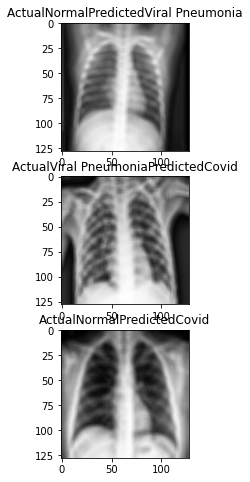

In [ ]:

y_test_og = lb.inverse_transform(y_test_encoded)
y_pred_og = lb.inverse_transform(y_pred)

diff  = y_test_og != y_pred_og
disp_all_images(X_test[diff], y_test_og[diff] ,y_pred_og[diff])

192    Normal
229    Normal
209    Normal
Name: Label, dtype: object


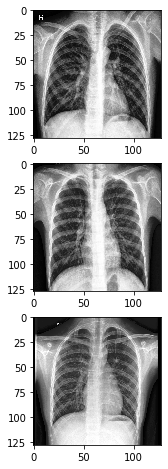

In [ ]:
# compare to a random sample of normals 
myList = list(np.where(labels.Label == "Normal"))[0]
normalLabels = labels.Label[myList].sample(3)
normalImages = images[normalLabels.index]
print(normalLabels)
disp_all_images(normalImages)

Summary
As can be seen from the confusion matrix, our model does very well on the test set, missing only 3 out of a sample of around 50.

After looking at the mistakes, compared to normal images, the mistakes seem reasonable. It is hard for a human to identify as well for those particular examples.